In [1]:
pickle_file = 'latest_results.pkl'

In [2]:
import numpy as np
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt

pd.options.display.max_rows = 2000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 255

In [3]:
with open('./pickles/%s' % pickle_file, 'rb') as f:
    results_df = pickle.load(f)    

In [4]:
def choose_largest_coefficient_name (coefficients):
    if coefficients is None:
        return None
    return coefficients.sort_values(by='abs_weight', ascending=False)['X_Column'].iloc[0]

def choose_largest_coefficient_weight (coefficients):    
    if coefficients is None:
        return None
    return coefficients.sort_values(by='abs_weight', ascending=False)['abs_weight'].iloc[0]
    
    
results_df['largest_coefficient_column'] = results_df['coefficients'].apply(choose_largest_coefficient_name)
results_df['largest_coefficient_weight'] = results_df['coefficients'].apply(choose_largest_coefficient_weight)

results_df \
    .drop(columns=['X_columns', 'coefficients'])

P      N    TP     FP     TN    FN    TPR    TNR  \
country        cutoff                                                        
United States  5000    3747  15592   820    360  15232  2927  0.219  0.977   
               5000    3747  15592   736    105  15487  3011  0.196  0.993   
               5000    3747  15592    32     96  15496  3715  0.009  0.994   
               2500    3747  15592   875    399  15193  2872  0.234  0.974   
               2500    3747  15592   555     76  15516  3192  0.148  0.995   
               2500    3747  15592     7     38  15554  3740  0.002  0.998   
               1000    3747  15592   912    395  15197  2835  0.243  0.975   
               1000    3747  15592   477     62  15530  3270  0.127  0.996   
               1000    3747  15592   516    814  14778  3231  0.138  0.948   
               500     3747  15592   921    418  15174  2826  0.246  0.973   
               500     3747  15592   491     67  15525  3256  0.131  0.996   
               500     3747  15592  3638  12029   3563   109  0.971  0.229   
               250     3747  15592   931    422  15170  2816  0.248  0.973   
               250     3747  15592   521     62  15530  3226  0.139  0.996   
               250     3747  15592   108    145  15447  3639  0.029  0.991   
               100     3747  15592   930    421  15171  2817  0.248  0.973   
               100     3747  15592   489     60  15532  3258  0.131  0.996   
               100     3747  15592  1149   1503  14089  2598  0.307  0.904   
India          5000    2585  16754   408    111  16643  2177  0.158  0.993   
               5000    2585  16754    40      6  16748  2545  0.015  1.000   
               5000    2585  16754   468   2233  14521  2117  0.181  0.867   
               2500    2585  16754   459    129  16625  2126  0.178  0.992   
               2500    2585  16754    21      3  16751  2564  0.008  1.000   
               2500    2585  16754     1      5  16749  2584  0.000  1.000   
               1000    2585  16754   492    133  16621  2093  0.190  0.992   
               1000    2585  16754    17      1  16753  2568  0.007  1.000   
               1000    2585  16754     1    218  16536  2584  0.000  0.987   
               500     2585  16754   500    135  16619  2085  0.193  0.992   
               500     2585  16754    17      1  16753  2568  0.007  1.000   
               500     2585  16754   360   1771  14983  2225  0.139  0.894   
               250     2585  16754   503    132  16622  2082  0.195  0.992   
               250     2585  16754    14      1  16753  2571  0.005  1.000   
               250     2585  16754     4     31  16723  2581  0.002  0.998   
               100     2585  16754   504    134  16620  2081  0.195  0.992   
               100     2585  16754    20      2  16752  2565  0.008  1.000   
               100     2585  16754  2017  11830   4924   568  0.780  0.294   
United Kingdom 5000    1138  18201     0      0  18201  1138  0.000  1.000   
               5000    1138  18201     0      0  18201  1138  0.000  1.000   
               5000    1138  18201     0      0  18201  1138  0.000  1.000   
               2500    1138  18201     0      0  18201  1138  0.000  1.000   
               2500    1138  18201     0      0  18201  1138  0.000  1.000   
               2500    1138  18201  1029  14482   3719   109  0.904  0.204   
               1000    1138  18201     0      0  18201  1138  0.000  1.000   
               1000    1138  18201     0      0  18201  1138  0.000  1.000   
               1000    1138  18201     0      0  18201  1138  0.000  1.000   
               500     1138  18201     0      0  18201  1138  0.000  1.000   
               500     1138  18201     0      0  18201  1138  0.000  1.000   
               500     1138  18201    84    309  17892  1054  0.074  0.983   
               250     1138  18201     0      0  18201  1138  0.000  1.000   
               250     1138  18201     0      0 

In [5]:
def generate_country_aggregates (runs_for_country):
    total_sims = runs_for_country.shape[0]
    nopes =  runs_for_country.query('TP == 0 and FP == 0').shape[0]
    proportion_of_nopes = round(nopes / total_sims, 3)
    country_proportion = round(runs_for_country.iloc[0]['P'] / (runs_for_country.iloc[0]['P'] + runs_for_country.iloc[0]['N']),3)

    result = pd.Series({
        'total_sims' : total_sims,
        'country_proportion': country_proportion,
        'nopes' : nopes,
        'proportion_of_nopes' : proportion_of_nopes,
    })
    
    return result
    
country_aggregates = results_df \
    .reset_index() \
    .drop(columns=['coefficients', 'X_columns']) \
    .groupby('country') \
    .apply(generate_country_aggregates)

country_aggregates

,total_sims,country_proportion,nopes,proportion_of_nopes
country,,,,
Australia,18.0,0.019,13.0,0.722
Brazil,18.0,0.027,15.0,0.833
Canada,18.0,0.035,14.0,0.778
France,18.0,0.029,16.0,0.889
Germany,18.0,0.059,13.0,0.722
India,18.0,0.134,0.0,0.000
Netherlands,18.0,0.020,15.0,0.833
Poland,18.0,0.020,15.0,0.833
United Kingdom,18.0,0.059,15.0,0.833


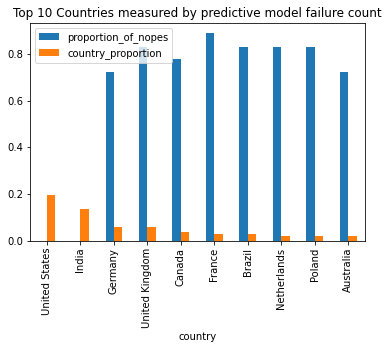

In [6]:
(country_aggregates[['proportion_of_nopes', 'country_proportion']]).sort_values(by='country_proportion', ascending=False).plot(kind="bar");
plt.title("Top 10 Countries measured by predictive model failure count");


In [7]:
non_useless_classifiers = results_df \
    .query('TP > 0 or FP > 0') \
    .drop(columns=['X_columns', 'coefficients'])

In [8]:
non_useless_classifiers.sort_values(by='TPR', ascending=False).head(10)

P      N    TP     FP     TN    FN    TPR    TNR  \
country        cutoff                                                        
United States  500     3747  15592  3638  12029   3563   109  0.971  0.229   
United Kingdom 2500    1138  18201  1029  14482   3719   109  0.904  0.204   
               250     1138  18201  1018  14371   3830   120  0.895  0.210   
India          100     2585  16754  2017  11830   4924   568  0.780  0.294   
Brazil         5000     517  18822   292  10032   8790   225  0.565  0.467   
United States  100     3747  15592  1149   1503  14089  2598  0.307  0.904   
               100     3747  15592   930    421  15171  2817  0.248  0.973   
               250     3747  15592   931    422  15170  2816  0.248  0.973   
               500     3747  15592   921    418  15174  2826  0.246  0.973   
               1000    3747  15592   912    395  15197  2835  0.243  0.975   

                         PPV    NPV    ACC         model_type  column_count  \
country        cutoff                                                         
United States  500     0.232  0.970  0.372         linear_svm           433   
United Kingdom 2500    0.066  0.972  0.246         linear_svm           358   
               250     0.066  0.970  0.251         linear_svm           439   
India          100     0.146  0.897  0.359         linear_svm           441   
Brazil         5000    0.028  0.975  0.470         linear_svm           291   
United States  100     0.433  0.844  0.788         linear_svm           441   
               100     0.688  0.843  0.833  linear_regression           441   
               250     0.688  0.843  0.833  linear_regression           439   
               500     0.688  0.843  0.832  linear_regression           433   
               1000    0.698  0.843  0.833  linear_regression           414   

                                      rowset_label          columnset_label  \
country        cutoff                                                         
United States  500      full_country_United States  all_numeric_categerical   
United Kingdom 2500    full_country_United Kingdom  all_numeric_categerical   
               250     full_country_United Kingdom  all_numeric_categerical   
India          100              full_country_India  all_numeric_categerical   
Brazil         5000            full_country_Brazil  all_numeric_categerical   
United States  100      full_country_United States  all_numeric_categerical   
               100      full_country_United States  all_numeric_categerical   
               250      full_country_United States  all_numeric_categerical   
               500      full_country_United States  all_numeric_categerical   
               1000     full_country_United States  all_numeric_categerical   

                       row_sample_rate  duration  \
country        cutoff                              
United States  500                   1    15.294   
United Kingdom 2500                  1    15.556   
               250                   1    15.799   
India          100                   1    15.443   
Brazil         5000                  1    19.170   
United States  100                   1    15.737   
               100                   1     0.982   
               250                   1     0.949   
               500                   1     0.908   
               1000                  1     0.908   

                                                                                        largest_coefficient_column  \
country        cutoff                                                                                                
United States  500                                                                                            None   
United Kingdom 2500                                                                                           None   
               250                                                                            

In [9]:
non_useless_classifiers.sort_values(by='PPV', ascending=False).head(10)

P      N   TP   FP     TN    FN    TPR    TNR    PPV  \
country       cutoff                                                            
India         500     2585  16754   17    1  16753  2568  0.007  1.000  0.944   
              1000    2585  16754   17    1  16753  2568  0.007  1.000  0.944   
              250     2585  16754   14    1  16753  2571  0.005  1.000  0.933   
              100     2585  16754   20    2  16752  2565  0.008  1.000  0.909   
United States 250     3747  15592  521   62  15530  3226  0.139  0.996  0.894   
              100     3747  15592  489   60  15532  3258  0.131  0.996  0.891   
              1000    3747  15592  477   62  15530  3270  0.127  0.996  0.885   
              2500    3747  15592  555   76  15516  3192  0.148  0.995  0.880   
              500     3747  15592  491   67  15525  3256  0.131  0.996  0.880   
              5000    3747  15592  736  105  15487  3011  0.196  0.993  0.875   

                        NPV    ACC     model_type  column_count  \
country       cutoff                                              
India         500     0.867  0.867  random_forest           433   
              1000    0.867  0.867  random_forest           414   
              250     0.867  0.867  random_forest           439   
              100     0.867  0.867  random_forest           441   
United States 250     0.828  0.830  random_forest           439   
              100     0.827  0.828  random_forest           441   
              1000    0.826  0.828  random_forest           414   
              2500    0.829  0.831  random_forest           358   
              500     0.827  0.828  random_forest           433   
              5000    0.837  0.839  random_forest           291   

                                    rowset_label          columnset_label  \
country       cutoff                                                        
India         500             full_country_India  all_numeric_categerical   
              1000            full_country_India  all_numeric_categerical   
              250             full_country_India  all_numeric_categerical   
              100             full_country_India  all_numeric_categerical   
United States 250     full_country_United States  all_numeric_categerical   
              100     full_country_United States  all_numeric_categerical   
              1000    full_country_United States  all_numeric_categerical   
              2500    full_country_United States  all_numeric_categerical   
              500     full_country_United States  all_numeric_categerical   
              5000    full_country_United States  all_numeric_categerical   

                      row_sample_rate  duration largest_coefficient_column  \
country       cutoff                                                         
India         500                   1     9.745                       None   
              1000                  1     9.851                       None   
              250                   1     9.666                       None   
              100                   1    10.025                       None   
United States 250                   1    10.423                       None   
              100                   1    10.936                       None   
              1000                  1    10.487                       None   
              2500                  1     9.709                       None   
              500                   1    10.537                       None   
              5000                  1     9.045                       None   

                      largest_coefficient_weight  
country       cutoff                              
India         500                            NaN  
              1000                           NaN  
              250                            NaN  
              100                            NaN  
United States 250                            NaN  
              100           

In [10]:
non_useless_classifiers.sort_values(by='ACC', ascending=False).head(10)

P      N  TP   FP     TN   FN    TPR    TNR    PPV  \
country     cutoff                                                         
Australia   100     358  18981   0    1  18980  358  0.000  1.000  0.000   
Netherlands 1000    396  18943   1   85  18858  395  0.003  0.996  0.012   
            500     396  18943   2  200  18743  394  0.005  0.989  0.010   
Australia   2500    358  18981  17  302  18679  341  0.047  0.984  0.053   
France      100     557  18782   0   84  18698  557  0.000  0.996  0.000   
Australia   500     358  18981  18  323  18658  340  0.050  0.983  0.053   
            1000    358  18981  21  343  18638  337  0.059  0.982  0.058   
Poland      100     381  18958   1  304  18654  380  0.003  0.984  0.003   
Canada      5000    681  18658   1   98  18560  680  0.001  0.995  0.010   
Australia   5000    358  18981  23  472  18509  335  0.064  0.975  0.046   

                      NPV    ACC  model_type  column_count  \
country     cutoff                                           
Australia   100     0.981  0.981  linear_svm           441   
Netherlands 1000    0.979  0.975  linear_svm           414   
            500     0.979  0.969  linear_svm           433   
Australia   2500    0.982  0.967  linear_svm           358   
France      100     0.971  0.967  linear_svm           441   
Australia   500     0.982  0.966  linear_svm           433   
            1000    0.982  0.965  linear_svm           414   
Poland      100     0.980  0.965  linear_svm           441   
Canada      5000    0.965  0.960  linear_svm           291   
Australia   5000    0.982  0.958  linear_svm           291   

                                rowset_label          columnset_label  \
country     cutoff                                                      
Australia   100       full_country_Australia  all_numeric_categerical   
Netherlands 1000    full_country_Netherlands  all_numeric_categerical   
            500     full_country_Netherlands  all_numeric_categerical   
Australia   2500      full_country_Australia  all_numeric_categerical   
France      100          full_country_France  all_numeric_categerical   
Australia   500       full_country_Australia  all_numeric_categerical   
            1000      full_country_Australia  all_numeric_categerical   
Poland      100          full_country_Poland  all_numeric_categerical   
Canada      5000         full_country_Canada  all_numeric_categerical   
Australia   5000      full_country_Australia  all_numeric_categerical   

                    row_sample_rate  duration largest_coefficient_column  \
country     cutoff                                                         
Australia   100                   1    19.750                       None   
Netherlands 1000                  1    19.448                       None   
            500                   1    19.628                       None   
Australia   2500                  1    18.875                       None   
France      100                   1    19.317                       None   
Australia   500                   1    18.962                       None   
            1000                  1    19.027                       None   
Poland      100                   1    19.987                       None   
Canada      5000                  1   499.997                       None   
Australia   5000                  1    17.703                       None   

                    largest_coefficient_weight  
country     cutoff                              
Australia   100                            NaN  
Netherlands 1000                           NaN  
            500                            NaN  
Australia   2500                           NaN  
France      100                            NaN  
Australia   500                            NaN  
            1000                           NaN  
Poland      100                            NaN  
Canada      5000                           NaN  
Australia   5000                   